In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.colors import Normalize
from matplotlib.colors import TwoSlopeNorm

In [2]:
#high and confident results
regression_result_path='../data/regression_result/regression'
tm_result_path='../data/csv/regression_tm.csv'


In [ ]:
#non IDR results 
regression_result_path='../data/regression_result/regression_IDR'
tm_result_path='../data/csv/regression_tm_IDR.csv'
#non HE results
regression_result_path='../data/regression_result/regression_non_HE'
tm_result_path='../data/csv/regression_tm_non_HE.csv'

In [3]:
def make_table_seperate(regression_result_path,feature='all'):
    if feature == 'all':
        feature_list=['pLDDT','exon skipping(isoform)','exon skipping(reference)',
                  'alternative donor site','alternative acceptor site','mutually exclusive exon',
                  'intron retention(isoform)','intron retention(reference)','alternative first exon',
                  'alternative last exon','mutually exclusive exon-alternative first exon',
                  'mutually exclusive exon-alternative last exon']
    elif feature == 'IDR' or feature == 'non_HE':
        feature_list=['pLDDT','exon skipping(isoform)','exon skipping(reference)',
                  'alternative donor site','alternative acceptor site','mutually exclusive exon',
                  'intron retention(reference)','alternative first exon',
                  'alternative last exon','mutually exclusive exon-alternative first exon',
                  'mutually exclusive exon-alternative last exon']
    effect_size_list=[]
    
    
    p_value_list=[]
    metric_list=[]
    feature_df=pd.DataFrame(columns=['feature','effect size','p-value','metric'])
    for file in os.listdir(regression_result_path):
        file_path=os.path.join(regression_result_path,file)
        df=pd.read_csv(file_path)
        df.rename(columns={'Estimate': 'effect_size', 'Pr(>|t|)': 'p_value'}, inplace=True)
        metric=file.split('_')[1].split('.')[0]
        effect_size_list+=list(df['effect_size'][1:])
        p_value_list+=list(df['p_value'][1:])
        metric_list+=[metric]*len(feature_list)
    all_feature_list=feature_list*len(os.listdir(regression_result_path))
    print(len(all_feature_list))
    feature_df['feature']=all_feature_list
    feature_df['effect size']=effect_size_list
    feature_df['p-value']=p_value_list
    feature_df['metric']=metric_list
    return feature_df
#feature_df=make_table_seperate(regression_result_path)
#feature_df=make_table_seperate(regression_result_path,scale=False)

In [4]:
feature_df=make_table_seperate(regression_result_path)

60


In [34]:
feature_df_IDR=make_table_seperate(regression_result_path,feature = 'IDR' )

55


In [4]:
feature_df_non_HE=make_table_seperate(regression_result_path,feature = 'IDR' )

55


In [5]:
def make_table_tm(tm_result_path):
    feature_list=['pLDDT','exon skipping','alternative donor site','alternative acceptor site',
                  'mutually exclusive exon','intron retention','alternative first exon',
                  'alternative last exon','mutually exclusive exon-alternative first exon',
                  'mutually exclusive exon-alternative last exon']
    feature_df=pd.DataFrame(columns=['feature','effect size','p-value','metric'])
    df=pd.read_csv(tm_result_path)
    df.rename(columns={'Estimate': 'effect_size', 'Pr(>|t|)': 'p_value'}, inplace=True)
    effect_size_list=list(df['effect_size'][1:])
    p_value_list=list(df['p_value'][1:])
    metric_list=['tm align']*len(feature_list)
    
    feature_df['feature']=feature_list
    feature_df['effect size']=effect_size_list
    
    feature_df['p-value']=p_value_list
    feature_df['metric']=metric_list
    return feature_df
#tm_feature_df=make_table_tm(tm_result_path)
#tm_feature_df=make_table_tm(tm_result_path,scale=False)

In [6]:
tm_feature_df=make_table_tm(tm_result_path)

In [36]:
tm_feature_df_IDR=make_table_tm(tm_result_path)

In [6]:
tm_feature_df_non_HE=make_table_tm(tm_result_path)

In [7]:
def merge_table(feature_df,tm_feature_df):
    feature_df=pd.concat([feature_df,tm_feature_df]).reset_index(drop=True)
    return feature_df
#feature_df=merge_table(feature_df,tm_feature_df)

In [8]:
feature_df=merge_table(feature_df,tm_feature_df)

In [38]:
feature_df_IDR=merge_table(feature_df_IDR,tm_feature_df_IDR)

In [8]:
feature_df_non_HE=merge_table(feature_df_non_HE,tm_feature_df_non_HE)

In [9]:
def replace_df(feature_df):
    replace_dic={'tm align':'TM-score','helix':'Helix','sheet':'Sheet','loop':'Loop','charge':'Surface Charge','radius':'Radius of Gyration(Å)',
                'alternative donor site':'Alternative Donor Site','alternative acceptor site':'Alternative Acceptor Site',
                'exon skipping':'Exon Skipping','exon skipping(isoform)':'Exon Skipping (Isoform)','exon skipping(reference)':'Exon Skipping (Reference)',
                'intron retention':'Intron Retention','intron retention(isoform)':'Intron Retention (Isoform)','intron retention(reference)':'Intron Retention (Reference)',
                'mutually exclusive exon':'Mutually Exclusive Exon','alternative first exon':'Alternative First Exon','alternative last exon':'Alternative Last Exon',
                'mutually exclusive exon-alternative first exon':'Mutually Exclusive Exon'+'\n'+'Alternative First Exon',
                'mutually exclusive exon-alternative last exon':'Mutually Exclusive Exon'+'\n'+'Alternative Last Exon'}
    feature_df=feature_df.replace(replace_dic)
    return feature_df

In [34]:
#feature_df['-log10(p-value)'] = -1 * np.log10(feature_df['p-value'])

In [10]:
feature_df['-log10(p-value)'] = -1 * np.log10(feature_df['p-value'])

/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
feature_df_IDR['-log10(p-value)'] = -1 * np.log10(feature_df_IDR['p-value'])

In [10]:
feature_df_non_HE['-log10(p-value)'] = -1 * np.log10(feature_df_non_HE['p-value'])

In [11]:
order_metric_list=['tm align','helix','sheet','loop','charge','radius']
#feature_df['metric'] = pd.Categorical(feature_df['metric'], categories=order_metric_list, ordered=True)

In [12]:
feature_df['metric'] = pd.Categorical(feature_df['metric'], categories=order_metric_list, ordered=True)

In [43]:
feature_df_IDR['metric'] = pd.Categorical(feature_df_IDR['metric'], categories=order_metric_list, ordered=True)

In [12]:
feature_df_non_HE['metric'] = pd.Categorical(feature_df_non_HE['metric'], categories=order_metric_list, ordered=True)

In [13]:
feature_df=feature_df[feature_df['feature']!='pLDDT']

In [44]:
feature_df_IDR=feature_df_IDR[feature_df_IDR['feature']!='pLDDT']

In [13]:
feature_df_non_HE=feature_df_non_HE[feature_df_non_HE['feature']!='pLDDT']

In [14]:
order_feature_list=['mutually exclusive exon-alternative last exon','mutually exclusive exon-alternative first exon',
                    'alternative last exon','alternative first exon',
                    'alternative acceptor site','alternative donor site',
                    'mutually exclusive exon',                    
                    'intron retention(isoform)','intron retention(reference)',
                    'exon skipping(isoform)','exon skipping(reference)',
                    'intron retention','exon skipping']

In [15]:
feature_df['feature'] = pd.Categorical(feature_df['feature'], categories=order_feature_list, ordered=True)
#feature_df=feature_df.sort_values('metric')
feature_df=feature_df.sort_values(by=['feature','metric']).reset_index(drop=True)

In [17]:
feature_df_non_HE['feature'] = pd.Categorical(feature_df_non_HE['feature'], categories=order_feature_list, ordered=True)
#feature_df=feature_df.sort_values('metric')
feature_df_non_HE=feature_df_non_HE.sort_values(by=['feature','metric']).reset_index(drop=True)

In [16]:
feature_df=replace_df(feature_df)

In [18]:
feature_df_non_HE=replace_df(feature_df_non_HE)

In [17]:
def linear_transform(data):
    # Find the minimum and maximum values of the input array
    min_val = np.min(data)
    max_val = np.max(data)
    
    # Define the desired range for the output
    desired_min = 100
    desired_max = 1000
    
    # Perform linear interpolation to transform the values
    transformed_data = ((data - min_val) / (max_val - min_val)) * (desired_max - desired_min) + desired_min
    
    return transformed_data

In [18]:
feature_df['Size']=linear_transform(feature_df['-log10(p-value)'])

In [25]:
feature_df_IDR['Size']=linear_transform(feature_df_IDR['-log10(p-value)'])

In [20]:
feature_df_non_HE['Size']=linear_transform(feature_df_non_HE['-log10(p-value)'])

In [21]:
feature_df_non_HE['-log10(p-value)'].min()

0.027618805321919748

In [22]:
feature_df = feature_df_non_HE

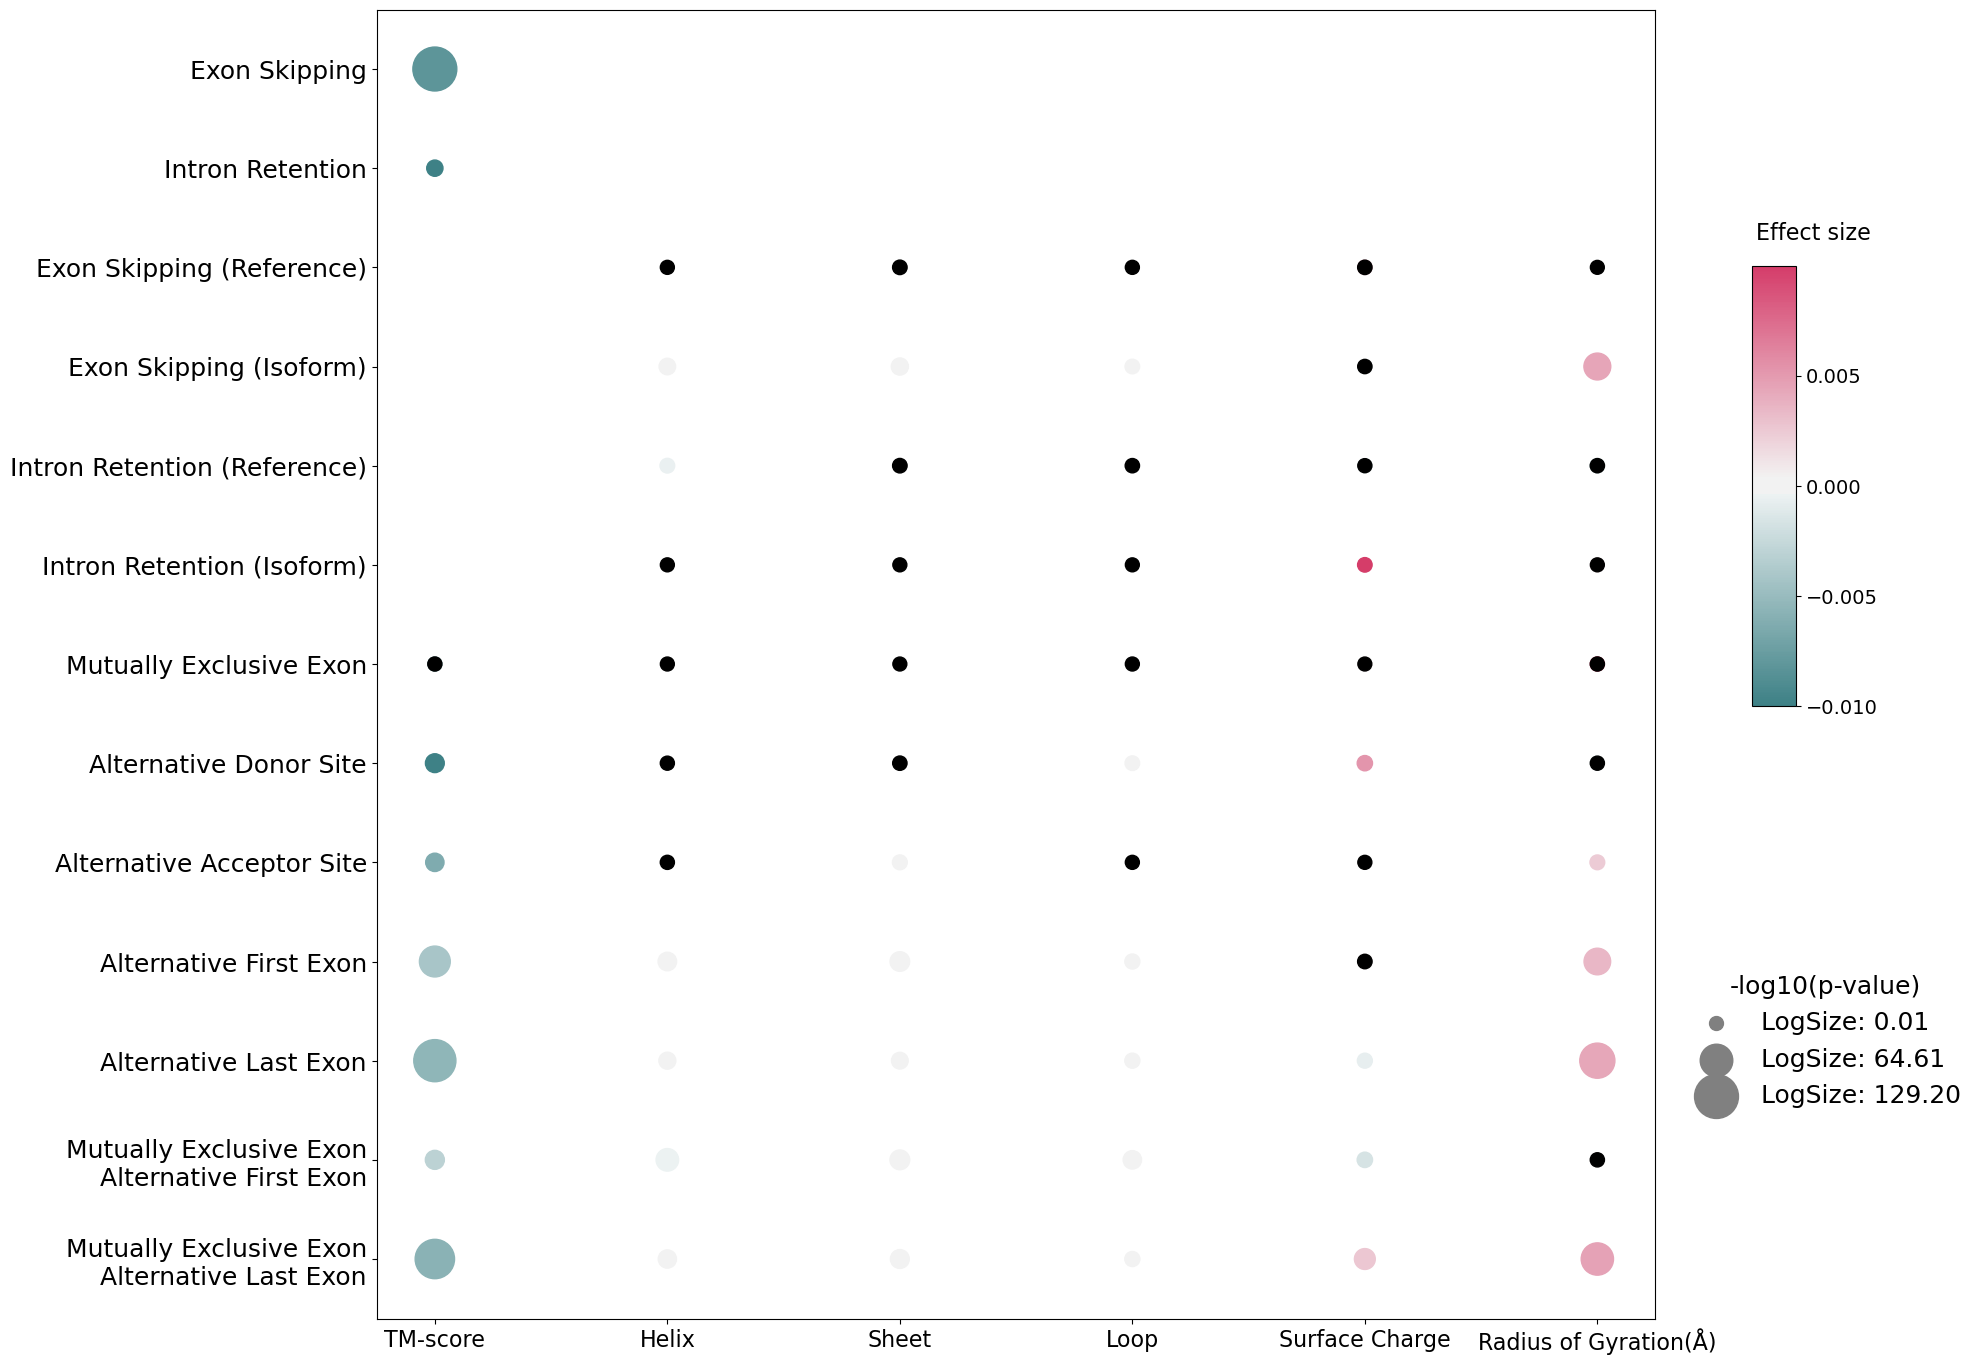

In [19]:
#Figure 6A, high and confident
fig, ax = plt.subplots(figsize=(22, 17))
cmap = sns.diverging_palette(200, 0, sep=10, n=8, as_cmap=True)
#
norm = TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=0.01)

scatter=plt.scatter(feature_df['metric'], feature_df['feature'], 
                    c=feature_df['effect size'],
                    cmap=cmap, s=feature_df['Size'],norm=norm)


non_significant_df=feature_df[feature_df['p-value']>0.05].reset_index(drop=True)
plt.scatter(non_significant_df['metric'], non_significant_df['feature'], 
                    c='black',s=non_significant_df['Size'])

color_bar = plt.colorbar(scatter,shrink=1,pad=0.1, aspect=10)
color_bar.ax.tick_params(labelsize=14)

color_bar.locator = ticker.MultipleLocator(0.005)
color_bar.update_ticks()

color_bar.ax.set_position([0.75,0.1, 0.02,1])
color_bar.set_label('Effect size',fontsize=16,rotation=0)
color_bar.ax.yaxis.set_label_coords(1.4,1.1) 

#set the logsize legend
size_min = feature_df['-log10(p-value)'].min()
size_max = feature_df['-log10(p-value)'].max()
scatter_size_min = 100
scatter_size_max = 1000
scaling_factor = (scatter_size_max - scatter_size_min) / (size_max - size_min)
num_circles = 3  
size_legend_circles = [size_min + (i / (num_circles - 1)) * (size_max - size_min) for i in range(num_circles)]
for size in size_legend_circles:
    plt.scatter([], [], s=(size- size_min) * scaling_factor + scatter_size_min, color='grey', label=f'LogSize: {size:.2f}')
size_legend=plt.legend(title='-log10(p-value)',fontsize=18,title_fontsize=18,frameon=False,bbox_to_anchor=(1.01, 0.28))

plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
ax.set(xlabel=None)
ax.set(ylabel=None)

#plt.savefig('regression_dot_plot_high_confident.png',dpi=600,bbox_inches='tight')
plt.show()


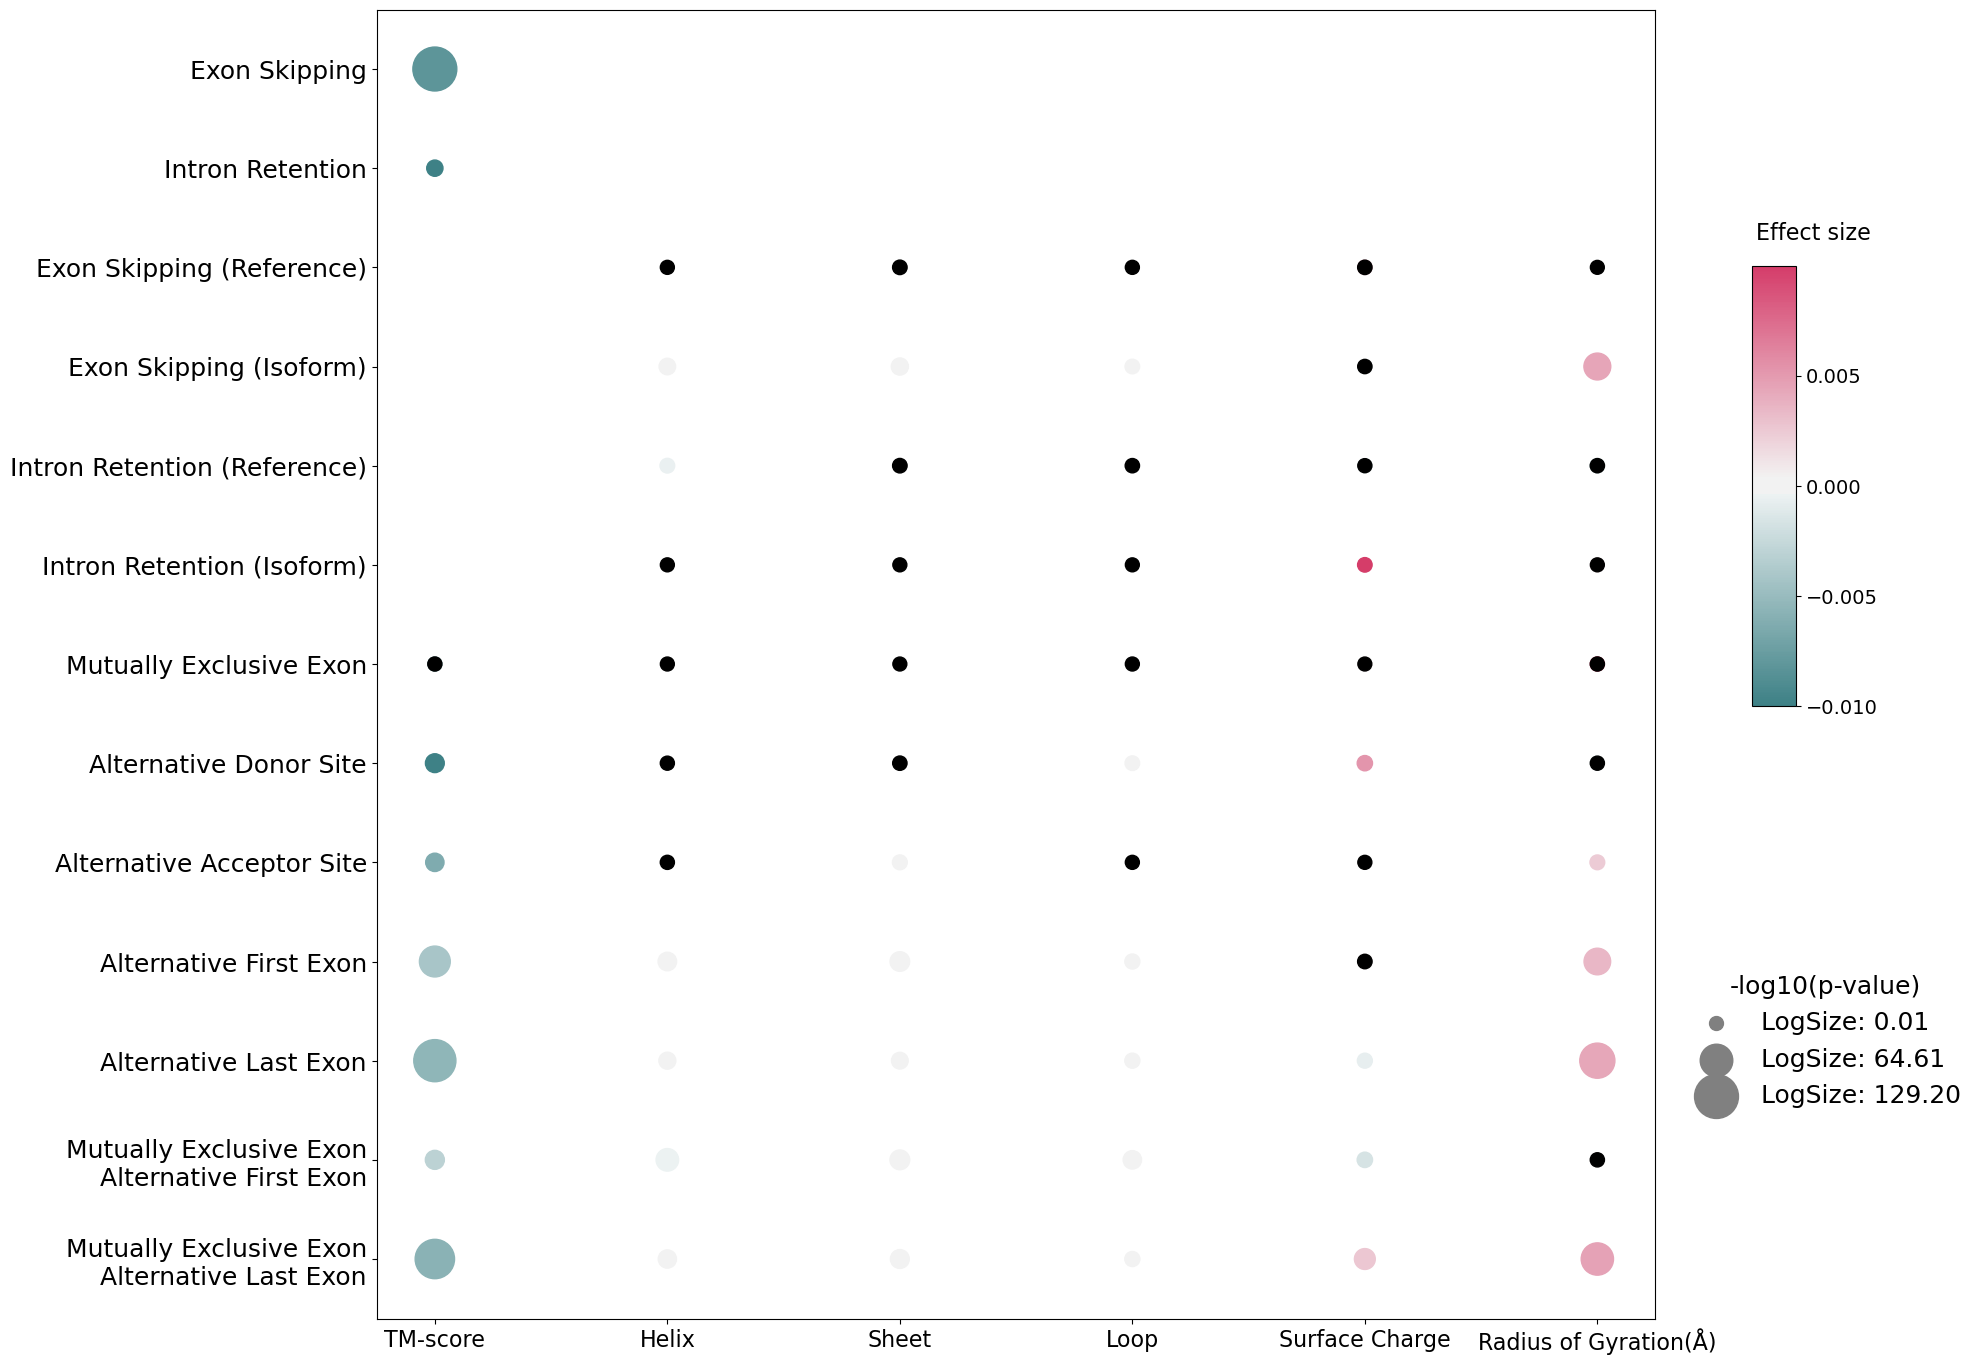

In [46]:
#non-IDR, non-isolated helices
fig, ax = plt.subplots(figsize=(22, 17))
cmap = sns.diverging_palette(200, 0, sep=10, n=8, as_cmap=True)
#
norm = TwoSlopeNorm(vmin=-0.01, vcenter=0, vmax=0.01)

scatter=plt.scatter(feature_df_non_HE['metric'], feature_df_non_HE['feature'], 
                    c=feature_df_non_HE['effect size'],
                    cmap=cmap, s=feature_df_non_HE['Size'],norm=norm)


non_significant_df=feature_df_non_HE[feature_df_non_HE['p-value']>0.05].reset_index(drop=True)
plt.scatter(non_significant_df['metric'], non_significant_df['feature'], 
                    c='black',s=non_significant_df['Size'])

color_bar = plt.colorbar(scatter,shrink=1,pad=0.1, aspect=10)
color_bar.ax.tick_params(labelsize=14)

color_bar.locator = ticker.MultipleLocator(0.005)
color_bar.update_ticks()

color_bar.ax.set_position([0.75,0.1, 0.02,1])
color_bar.set_label('Effect size',fontsize=16,rotation=0)
color_bar.ax.yaxis.set_label_coords(1.4,1.1) 

#set the logsize legend
size_min = feature_df_non_HE['-log10(p-value)'].min()
size_max = feature_df_non_HE['-log10(p-value)'].max()
scatter_size_min = 100
scatter_size_max = 1000
scaling_factor = (scatter_size_max - scatter_size_min) / (size_max - size_min)
num_circles = 3  
size_legend_circles = [size_min + (i / (num_circles - 1)) * (size_max - size_min) for i in range(num_circles)]
for size in size_legend_circles:
    plt.scatter([], [], s=(size- size_min) * scaling_factor + scatter_size_min, color='grey', label=f'LogSize: {size:.2f}')
size_legend=plt.legend(title='-log10(p-value)',fontsize=18,title_fontsize=18,frameon=False,bbox_to_anchor=(1.01, 0.28))


#plt.xticks(fontsize=15,fontweight='bold')
#plt.yticks(fontsize=18,fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=18)
ax.set(xlabel=None)
ax.set(ylabel=None)
#plt.savefig('regression_dot_plot_IDR.png',dpi=600,bbox_inches='tight')
#plt.savefig('regression_dot_plot_non_HE.png',dpi=600,bbox_inches='tight')
#plt.savefig('regression_dot_plot_high_confident.png',dpi=600,bbox_inches='tight')
plt.show()
#